In [1]:
import numpy as np
rng = np.random.default_rng()
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [2]:
# read file with single input variable

def read_input_file(filename):
    x = []
    y = []
    
    with open(filename) as f:
        lines = f.readlines()
        for line in lines[1:]:
            line = [float(i.strip()) for i in line.split(',')]
            x.append(line[0])
            y.append(line[1])
    
    return np.asarray(x), np.asarray(y)

In [3]:
dataset = '2'

In [4]:
# enter training data
filename = f'datasets/{dataset}/train.txt'

x, y = read_input_file(filename)

In [5]:
tqdm._instances.clear()

In [6]:
# build model using training data
# gradient descent for loss function

def linear_regression(x, y):
    # a = 0
    a = rng.uniform(-1, 1)
    # b = 0
    b = rng.uniform(-1, 1)
    alpha = 0.0001
    n = len(x)

    epochs = 100000 // n
    for e in trange(epochs):
        for num in range(n):
            y_pred = a*x + b
            partial_a = (1/n)*np.sum((y_pred-y)*x)
            partial_b = (1/n)*np.sum(y_pred-y)
            a = a - alpha*partial_a
            b = b - alpha*partial_b
        
    return a, b

In [7]:
# weights and bias learned
a, b = linear_regression(x, y)

100%|██████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 333.23it/s]


In [8]:
# read test file

def read_test_file(test_file):
    t = []
    
    with open(test_file) as f:
        lines = f.readlines()
        for line in lines[1:]:
            line = [float(i.strip()) for i in line.split(',')]
            t.append(line[0])
        
    return np.asarray(t)

In [9]:
# test file
filename = f'datasets/{dataset}/test.txt'
t = read_test_file(filename)

In [10]:
# make predictions
# plot the graph

def plot (x, y, t, a, b):
    y_test = []
    
    for num in range(len(x)):
        y_test.append(a*t[num] + b)
        
    # write predicted values to new file    
    # with open('result_2.txt', 'w') as f:
    #     for val in y_test:
    #         f.write("%s\n" % val)
    
    # plot training input data points (input, output)
    plt.scatter(x, y, label="training data points") 
    
    # plot linear function learned from training data
    plt.plot(x, a*x+b, color='red', label='trained linear function')
    
    # plot predicted value for test file
    plt.scatter(t, y_test, color='orange', label="predicted output values")
    plt.legend()

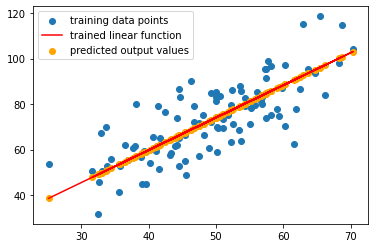

In [11]:
plot(x, y, t, a, b)